N:  1000 cg ..
cg info:  0
N:  1000 lu ..
N:  1100 cg ..
cg info:  0
N:  1100 lu ..
N:  1200 cg ..
cg info:  0
N:  1200 lu ..
N:  1300 cg ..
cg info:  0
N:  1300 lu ..
N:  1400 cg ..
cg info:  0
N:  1400 lu ..
N:  1500 cg ..
cg info:  0
N:  1500 lu ..
N:  1600 cg ..
cg info:  0
N:  1600 lu ..
N:  1700 cg ..
cg info:  0
N:  1700 lu ..
N:  1800 cg ..
cg info:  0
N:  1800 lu ..
N:  1900 cg ..
cg info:  0
N:  1900 lu ..


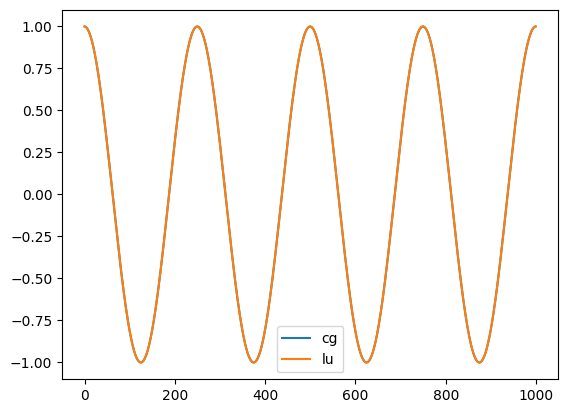

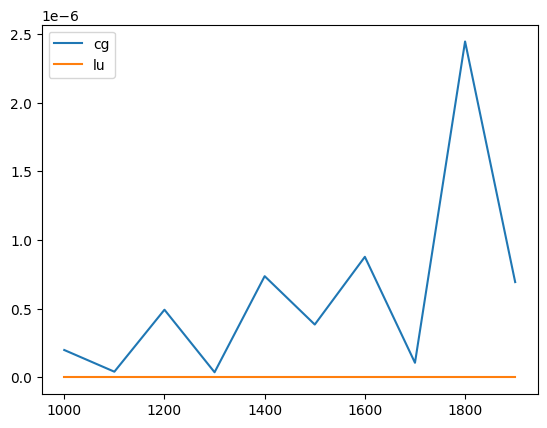

In [9]:
import numpy as np
from math import *
import time
import matplotlib.pyplot as pl
from numpy.linalg import solve
from scipy.sparse.linalg import cg

def fwavelu(N,L) :
  ''' fwave solves the 1D Helmholtz equation 
      using LU decomposition.  

    Parameters:
      N:  No of gridpoints
      L:  Length of the model (meters)

    Returns:
      p: Solution vector
      A: Matrix
  '''
  dx=L/N
  c=np.zeros(N-1)
  c[:]=2000.0

  f = 8*c[0]/(2*L)
  r=np.zeros(N-1)

  for i in range(0,N-1):
    pi=3.14159
    k=(2.0*pi*f)/c[i]
    r[i] = 2-dx*dx*k*k

  # Set up the s vector
  s=np.zeros(N-1)
  s[0] = -1.0
  s[N-2] = -1.0

  # Set up the A matrix 
  A = np.zeros([N-1,N-1])
    #Create the first row (0)
  A[0,0] =-r[0]
  A[0,1] = 1

  #Create the last row (N-2)
  A[N-2,N-3] = 1
  A[N-2,N-2] = -r[N-2]

  #Create rows 1 to N-3
  i=0
  for j in range(1,N-2) :
    i=i+1
    A[i,j] = -r[i]
    A[i,j-1] = 1
    A[i,j+1] = 1
    
  #Solve the matrix with LU decomp
  p=solve(A,s)
  return A,p,s

def fwavecg(N,L) :
  ''' fwave solves the 1D Helmholtz equation 
    using the conjugate gradient method.  

    Parameters:
      N:  No of gridpoints
      L:  Length of the model (meters)

    Returns:
      p: Solution vector
      A: Matrix
  '''
  dx=L/N
  c=np.zeros(N-1)
  c[:]=2000.0

  f = 8*c[0]/(2*L)
  r=np.zeros(N-1)

  for i in range(0,N-1):
    pi=3.14159
    k=(2.0*pi*f)/c[i]
    r[i] = 2-dx*dx*k*k

  # Set up the s vector
  s=np.zeros(N-1)
  s[0] = -1.0
  s[N-2] = -1.0

  # Set up the A matrix 
  A = np.zeros([N-1,N-1])
    # Set up the A matrix 
  A = np.zeros([N-1,N-1])

  #Create the first row (0)
  A[0,0] =-r[0]
  A[0,1] = 1

  #Create the last row (N-2)
  A[N-2,N-3] = 1
  A[N-2,N-2] = -r[N-2]

  #Create rows 1 to N-3
  i=0
  for j in range(1,N-2) :
    i=i+1
    A[i,j] = -r[i]
    A[i,j-1] = 1
    A[i,j+1] = 1

  #Solve the matrix with cg
  p,info=cg(A,s)
  print("cg info: ",info)
  return A,p,s

# Script for running fwave
#
nruns=10
dim   =np.zeros(nruns)
errcg=np.zeros(nruns)
errlu=np.zeros(nruns)
N=1000
for k in range(0,nruns):
  L=1000.0
  dx=L/N
  dim[k]=N

  x=np.zeros(N-1)
  for i in range(0,N-1):
    x[i]=i*dx

  print("N: ", N, "cg ..")
  t0=time.perf_counter()
  A,pcg,s=fwavecg(N,L)
  errcg[k] = sqrt(np.dot(A@pcg-s,A@pcg-s))
  print("N: ", N, "lu ..")
  t0=time.perf_counter()
  A,plu,s=fwavelu(N,L)
  errlu[k] = sqrt(np.dot(A@plu-s,A@plu-s))

  N=N+100

fig=pl.figure()
pl.plot(x,pcg,label='cg')
pl.plot(x,plu,label='lu')
pl.legend()
pl.show()
pl.plot(dim,errcg,label='cg')
pl.plot(dim,errlu,label='lu')
pl.legend()
pl.show()







